In [102]:
import cv2
import glob
import pickle
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse

in_path = 'pkl/'
out_path = 'masks_for_cv2/'

all_files = glob.glob(in_path+'*.pkl')
all_files.sort()

for file in all_files:

    with open(file,'rb') as f:
        masks = pickle.load(f)
        
    for i in range(np.shape(masks)[0]):
        image_name = Path(file).stem
        mask_tmp = masks[i]
        plt.imsave(out_path+image_name+'_h'+str(i)+'.png', np.array(mask_tmp).reshape(500,500), cmap=cm.gray)

In [123]:
bi = 'masks_for_cv2/mask_array_odm_orth_0_0_h0.png'
img_tmp = Image.open(bi)

In [1]:

bi = 'masks_for_cv2/mask_array_odm_orth_0_0_h0.png'
img_tmp = cv2.imread(bi)
img = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2GRAY)

contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

for ind, cont in enumerate(contours):
    elps = cv2.fitEllipse(cont)
    #Feed elps directly into cv2.ellipse

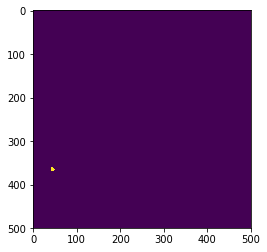

In [29]:
plt.imshow(img)

In [27]:
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt


xcenter, ycenter = elps[0][0], elps[0][1]
width, height = elps[1][0], elps[1][1]
angle = elps[2]

theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
x = 0.5 * width * np.cos(theta)
y = 0.5 * height * np.sin(theta)

rtheta = np.radians(angle)
R = np.array([
    [np.cos(rtheta), -np.sin(rtheta)],
    [np.sin(rtheta),  np.cos(rtheta)],
    ])


x, y = np.dot(R, np.array([x, y]))
x += xcenter
y += ycenter

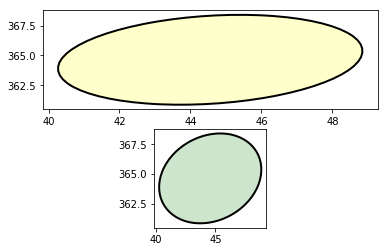

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='auto')
ax.fill(x, y, alpha=0.2, facecolor='yellow',
        edgecolor='yellow', linewidth=1, zorder=1)

e1 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)

ax.add_patch(e1)

#ax = fig.add_subplot(212, aspect='equal')
ax.fill(x, y, alpha=0.2, facecolor='green', edgecolor='green', zorder=1)
e2 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)


ax.add_patch(e2)
fig.savefig('ellipse_compare')

In [19]:
plt.figure()
ax = Ellipse(elps[0], elps[1][0], elps[1][1], angle=elps[2],linewidth=2,color='red')
plt.show()

<Figure size 432x288 with 0 Axes>